In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Loading the dataset*

In [2]:
file_path = r'D:\Karan\Jupyter\dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

*Cleaning the data*

In [3]:
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

*Converting Release Date to datetime*

In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [5]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4598 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   object        
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4598 non-null   object        
 8   Spotify Playlist Count      4598 non-null   object        
 9   Spotify Playlist Reach      4598 non-null   object        
 10  Spotify Popularity          4598 non-null   float64       
 11  YouTube Views               4598 non-null   objec

In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                        Release Date  Track Score  Spotify Popularity  \
count                           4598  4598.000000         4598.000000   
mean   2021-01-27 10:44:50.213136128    41.850892           52.395389   
min              1987-07-21 00:00:00    19.400000            0.000000   
25%              2019-07-17 06:00:00    23.300000           45.000000   
50%              2022-06-01 00:00:00    29.900000           65.000000   
75%              2023-08-11 00:00:00    44.475000           71.000000   
max              2024-06-14 00:00:00   725.400000           96.000000   
std                              NaN    38.550706           28.251717   

       Apple Music Playlist Count  Deezer Playlist Count  \
count                 4598.000000            4598.000000   
mean                    47.950196              25.847542   
min                      0.000000               0.000000   
25%                      6.000000               1.000000   
50%                  

*Track score distribution*

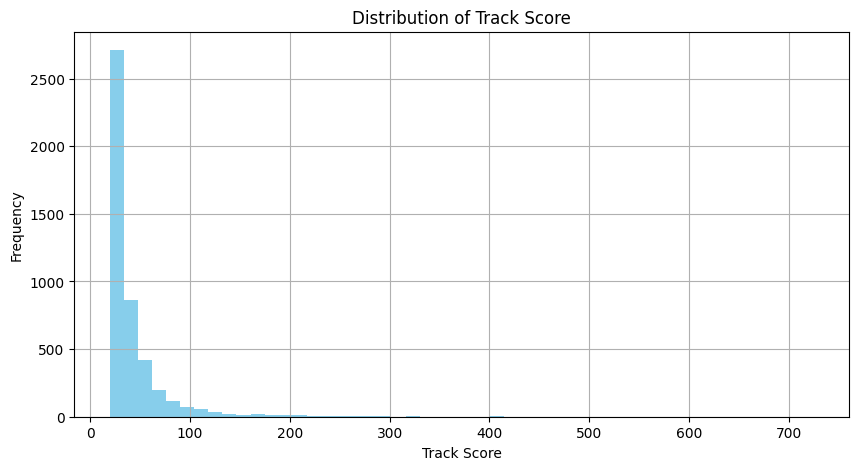

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(df['Track Score'], bins=50, color='skyblue')
plt.title('Distribution of Track Score')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*Realtion table*

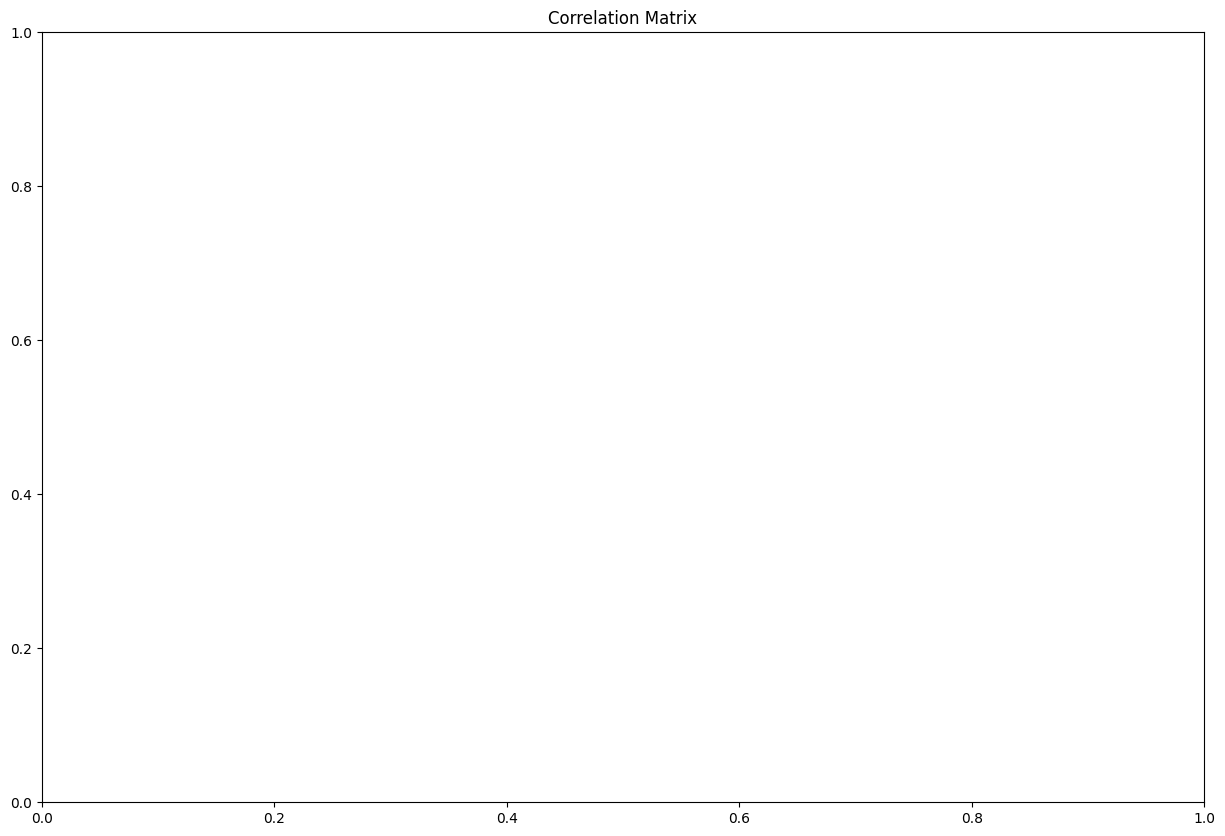

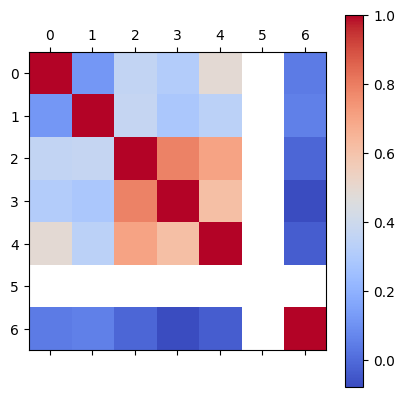

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix')
cax = plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.show()

*Top 10 artists by track score*

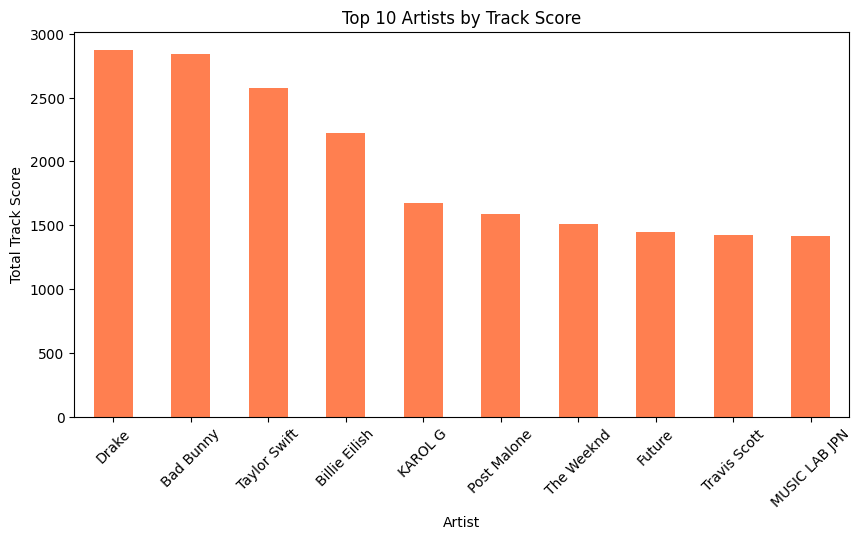

In [9]:
top_artists = df.groupby('Artist')['Track Score'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_artists.plot(kind='bar', color='coral')
plt.title('Top 10 Artists by Track Score')
plt.xlabel('Artist')
plt.ylabel('Total Track Score')
plt.xticks(rotation=45)
plt.show()

*Comparison between Spotify streams and youtube views*

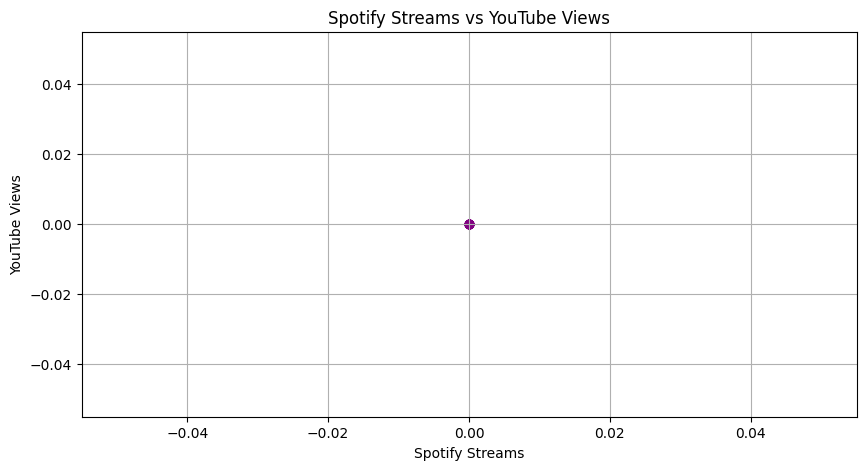

In [10]:
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'], errors='coerce')
df['YouTube Views'] = pd.to_numeric(df['YouTube Views'], errors='coerce')
df = df.dropna(subset=['Spotify Streams', 'YouTube Views'])
plt.figure(figsize=(10, 5))
plt.scatter(df['Spotify Streams'], df['YouTube Views'], alpha=0.5, color='purple')
plt.title('Spotify Streams vs YouTube Views')
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.grid(True)
plt.show()


*Spotify Popularity vs TikTok Likes*

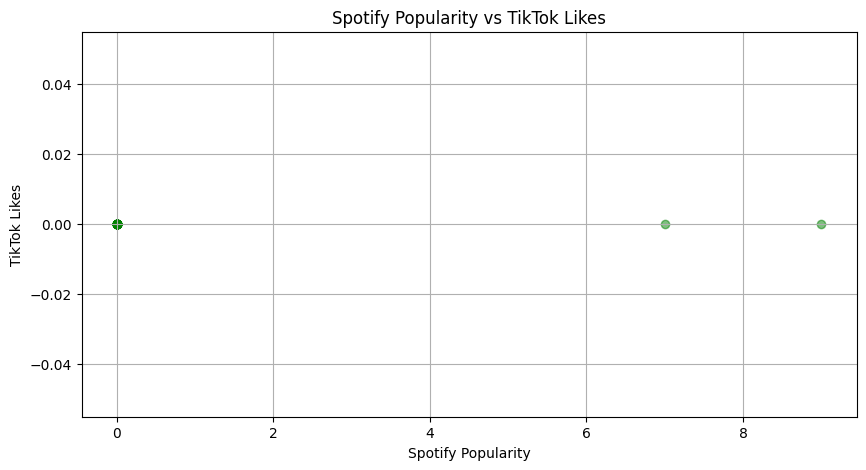

In [11]:
df['Spotify Popularity'] = pd.to_numeric(df['Spotify Popularity'], errors='coerce')
df['TikTok Likes'] = pd.to_numeric(df['TikTok Likes'], errors='coerce')
df = df.dropna(subset=['Spotify Popularity', 'TikTok Likes'])
plt.figure(figsize=(10, 5))
plt.scatter(df['Spotify Popularity'], df['TikTok Likes'], alpha=0.5, color='green')
plt.title('Spotify Popularity vs TikTok Likes')
plt.xlabel('Spotify Popularity')
plt.ylabel('TikTok Likes')
plt.grid(True)
plt.show()

*Saving cleaned data to new file*

In [12]:
output_path = 'info.csv'
df.to_csv(output_path, index=False)